# Introduction to plotting with Matplotlib, pandas, and Seaborn

## Learning Objectives

1. Say why Matplotlib and Jupyter pair well together
2. Name, recognize, and use the two interfaces to Matplotlib
3. Understand the connection between Matplotlib, pandas, and Seaborn
4. Understand subplots, figures, and axes
5. Know the recommended functional form for writing your own plotting functions

## Plotting in Python

There are many libraries for doing plotting in Python. Some you may encounter:
- **Matplotlib**
- **pandas**
- **Seaborn**
- ggplot (port of R package of the same name)
- Plotly
- Bokeh

All of these aim to solve the same problem: allowing you to visualize your data.

## Why so many?

Plotting is at the intersection of widely varying disciplines, such as:
- Aesthetics
- Human perception
- Trade-offs in combining simple interfaces with the ability to customize them

## Appreciating the challenges

A good plotting library should:
- Be easy to use
- Allow plotting of all kinds of data
- Support arbitrarily fine-grained control
- Support a variety of backends to make graphs in various formats

## Matplotlib

While everyone has different opinions about what library is best, everybody knows and has used Matplotlib. This makes it the de-facto choice for plotting in Python.

### How does it work?

In an effort to make easy things easy, and hard things possible, Matplotlib has a number of different levels at which it can be accessed. They are:

| Level | Control | Complexity |
|---|---|---|
| Function interface w/ `plt` | Minimal and fast interface for plots and annotations | low |
| OO interface | Fine-grained control over figure, axes, etc. | Medium |
| Pure OO interface | Embed plots in GUI applications | HIGH |

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
# (use Jupyter notebook's "magic" function to plot directly in the notebook)

## Function interface w/ `plt`

In [2]:
import numpy as np

x_data = np.arange(0, 5, .011)
y1_data = np.sin(x_data)
y2_data = np.cos(x_data)

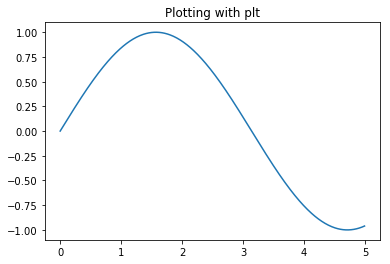

In [3]:
plt.plot(x_data, y1_data)
plt.title('Plotting with plt')

plt.show() # (optional)

In [4]:
type(plt)

module

### Weird

`plt` was imported as a library, but it appears to be keeping some state between the lines above, behavior that we'd usually associate with objects. In fact, `plt`, operates in a not-very-pythonic way.

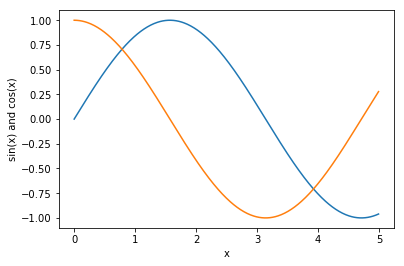

In [5]:
plt.plot(x_data, y1_data)

# we can actually keep adding state here; it will be reflected when the plot is generated

plt.plot(x_data, y2_data) # second plot in same figure

# and so on...

plt.xlabel('x')
plt.ylabel('sin(x) and cos(x)')

If you thought it was strange that we were working in Python, but that we didn't seem to be using any objects to make our plot, join the club!

### Behind the curtain

![Matplotlib Objects](http://matplotlib.org/_images/fig_map.png)

### Common things to do with plots

Axis sizes, aspect ratios, titles, legends, colors and line styles, etc. E.g.:

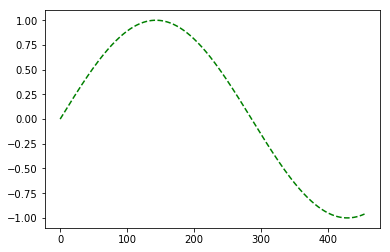

In [6]:
plt.plot(y1_data, color='g', linestyle='--') # green, dashed

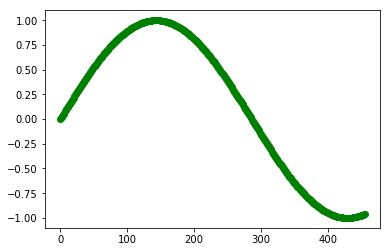

In [7]:
plt.plot(y1_data, 'go') # green, thick

### Subplots

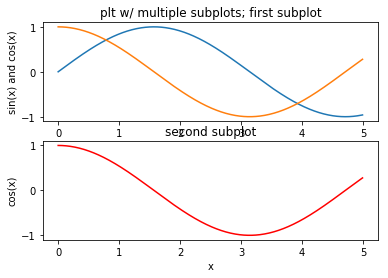

In [8]:
plt.subplot(2, 1, 1) # number of rows, number of columns, plot number
plt.plot(x_data, y1_data) # first plot
plt.plot(x_data, y2_data) # second plot in same subplot
plt.title('plt w/ multiple subplots; first subplot')
plt.xlabel('x')
plt.ylabel('sin(x) and cos(x)')

plt.subplot(2, 1, 2) # number of rows, number of columns, plot number
plt.plot(x_data, y2_data, color='r') # second plot in a separate subplot
plt.title('second subplot')
plt.xlabel('x')
plt.ylabel('cos(x)')

## OO interface w/ pyplot

In [9]:
plt.figure?

In [10]:
fig = plt.figure()
fig.add_subplot?

Same example as above but using the OO interface:

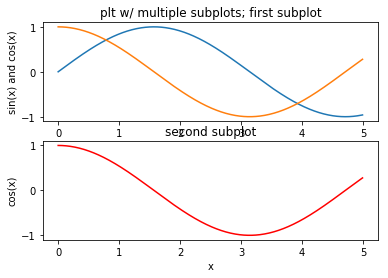

In [11]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 1, 1) # number of rows, number of columns, plot number
ax1.plot(x_data, y1_data) # first plot
ax1.plot(x_data, y2_data) # second plot in same subplot
ax1.set_title('plt w/ multiple subplots; first subplot')
ax1.set_xlabel('x')
ax1.set_ylabel('sin(x) and cos(x)')

ax2 = fig.add_subplot(2, 1, 2) # number of rows, number of columns, plot number
ax2.plot(x_data, y2_data, color='r') # second plot in a separate subplot
ax2.set_title('second subplot')
ax2.set_xlabel('x')
ax2.set_ylabel('cos(x)')

In this example, the fact that state is maintained is less surprising.

Let's make the plot larger, and let's put on subplot on top of the other!

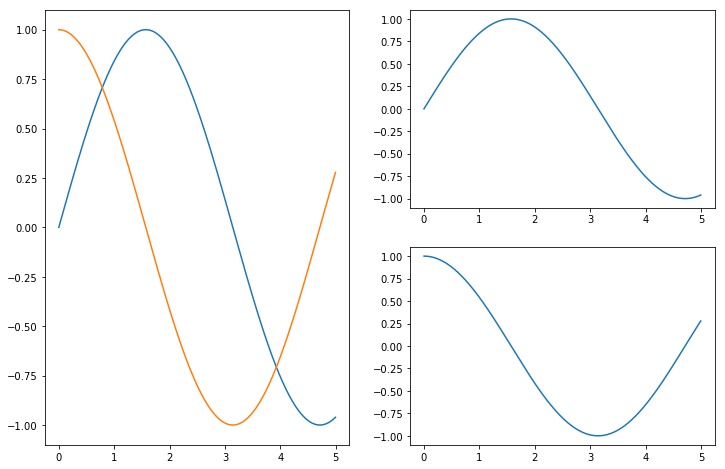

In [12]:
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(121) # number of rows, number of columns, plot number; same as 1, 2, 1
ax1.plot(x_data, y1_data)
ax1.plot(x_data, y2_data)

ax2 = fig.add_subplot(222)
ax2.plot(x_data, y1_data)

ax3 = fig.add_subplot(224)
ax3.plot(x_data, y2_data)

### Mix 'n' Match

Turns out, you can combine Matplotlib function-oriented and object-oriented approaches.

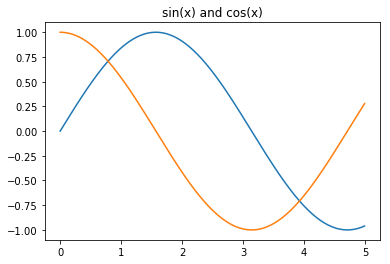

In [13]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.plot(x_data, y1_data)
ax.plot(x_data, y2_data)

plt.title('sin(x) and cos(x)')

### Why should we use the OO oriented approach?

If we want to exercise fine-grained control over our plots that isn't offered via the `plt` shortcuts.

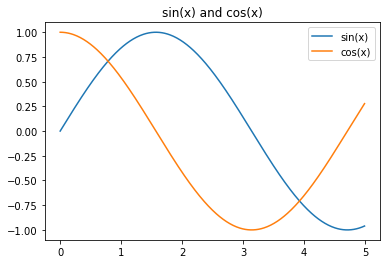

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_data, y1_data, label='sin(x)')
ax.plot(x_data, y2_data, label='cos(x)')
ax.set_title('sin(x) and cos(x)')
ax.legend()

# Multiple plots, using 'subplots'

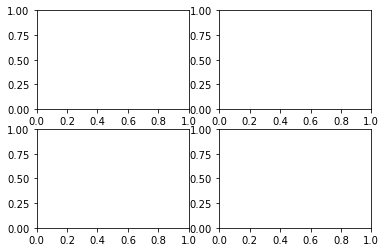

In [15]:
_, ax_list = plt.subplots(2, 2)

ax_list

In [16]:
ax_list.flatten()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009F14208>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000A240A20>], dtype=object)

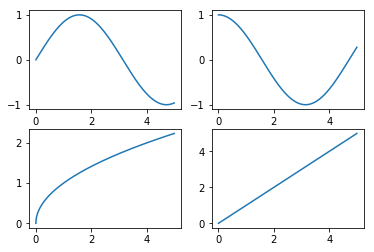

In [17]:
_, ax_list = plt.subplots(2, 2)

y_funcs = [np.sin, np.cos, np.sqrt, lambda x: x]
for ax, y_func in zip(ax_list.flatten(), y_funcs):
    y_data = y_func(x_data)
    ax.plot(x_data, y_data)

## pandas

pandas provides a 'one-stop shop' for dataframes and plots.

In [18]:
import pandas as pd

In [19]:
df = pd.DataFrame({'x': x_data, 'sinx': np.sin(x_data), 'cosx': np.cos(x_data)}).set_index('x')

df.head()

,cosx,sinx
x,,
0.000,1.000000,0.000000
0.011,0.999940,0.011000
0.022,0.999758,0.021998
0.033,0.999456,0.032994
0.044,0.999032,0.043986


In [20]:
df.cosx.plot?

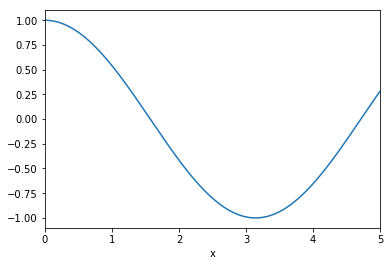

In [21]:
df.cosx.plot()

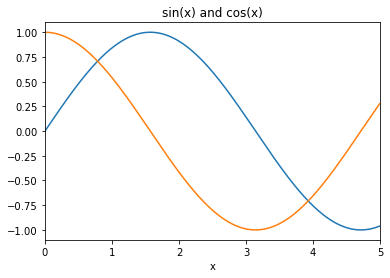

In [22]:
# two plot commands just add to the same figure:

df.sinx.plot()
ax = df.cosx.plot()
ax.set_title('sin(x) and cos(x)')

The pandas series plot method returns a familiar Matplotlib axes object.

In [23]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

What will this look like?

(-1.5, 1.5)

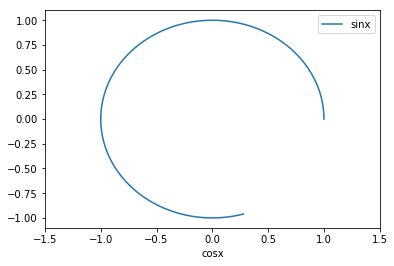

In [24]:
ax = df.plot('cosx', 'sinx')
ax.set_xlim(-1.5, 1.5)

We can also supply an axes object on which to draw!

(-3, 3)

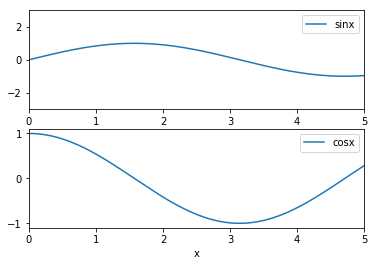

In [25]:
_, ax_list = plt.subplots(2, 1)
cols = ['sinx', 'cosx']
for ax, col in zip(ax_list, cols):
    df[col].plot(ax=ax)
    ax.legend()
top_ax = ax_list[0]
top_ax.set_ylim(bottom=-3, top=3)

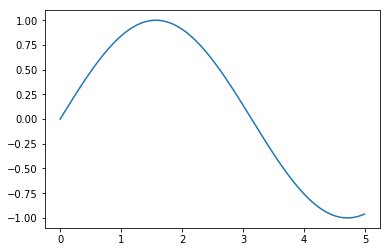

In [26]:
plt.plot(x_data, y1_data)

In [27]:
def our_own_function(*args, **kwargs):
    print args, kwargs

our_own_function(1,2,3, one=1, two=2)

(1, 2, 3) {'two': 2, 'one': 1}


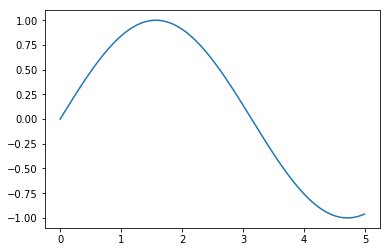

In [28]:
data = (x_data, y1_data)
plt.plot(*data)

# Writing plotting functions

In [29]:
def my_plotter(ax, data1, data2, **kwargs):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax: Axes
        The axes to draw to

    data1: array
       The x data

    data2: array
       The y data

    **kwargs, a dictionnary of keyword arguments to pass to ax.plot

    Returns
    -------
    out: list
        list of artists added
    """

    out = ax.plot(data1, data2, **kwargs)
    return [out]

Here's an example of how you might use the function above:

[[<matplotlib.lines.Line2D at 0xd2dcfd0>]]

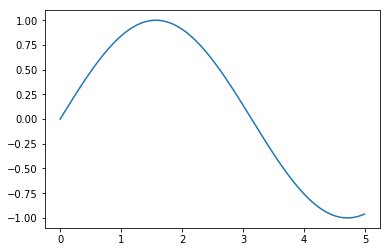

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)
my_plotter(ax, x_data, y1_data)

### Example:

Let's write a function that plots data and some horizontal lines representing the 25th and 75th percentile. We'll call this function `iqr_plot()`.

- I DO: Write a function `horizontal_line` for drawing a horizontal line on an axis object
- WE DO: Write the `iqr_plot()` function that plots the data and inner-quartile range on an axis object
- YOU DO: Make a 2-by-2 grid of plots using the `iqr_plot()` function using `sin`, `cos`, `exp`, and `x ** 3`

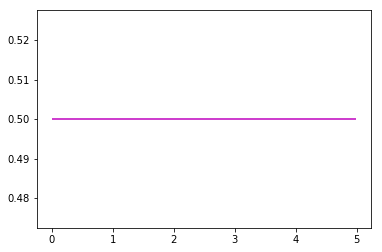

In [31]:
# I DO: Write a function horizontal_line for drawing a horizontal line on an axis object

def horizontal_line(ax, x_data, y, **kwargs):
    line = ax.hlines(y, min(x_data), max(x_data), **kwargs)
    return [line]

# Here's an example of how you might use the function above:

fig = plt.figure()
ax = fig.add_subplot(111)
horizontal_line(ax, x_data, .5, color='m')

(0.0, 1.5707963267948966)

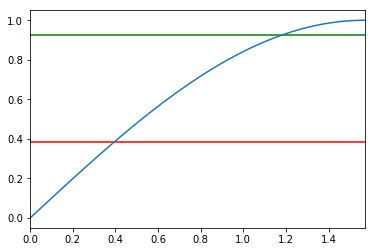

In [32]:
# WE DO: Write the iqr_plot() function that plots the data and inner-quartile range on an axis object

def iqr_plot(ax, x_data, y_data, **kwargs):
    # plot the data
    l1 = ax.plot(x_data, y_data)

    # plot 25th and 75th percentiles lines
    p25, p75 = np.percentile(y_data, [25, 75])
    l2 = horizontal_line(ax, x_data, p25, color='r', **kwargs)
    l3 = horizontal_line(ax, x_data, p75, color='g', **kwargs)

    return l1 + l2 + l3

# Here's an example of how you might use the function above:

fig = plt.figure()
ax = fig.add_subplot(111)
x_data = np.linspace(0, np.pi / 2, 100)
y_data = np.sin(x_data)
iqr_plot(ax, x_data, y_data)
ax.set_xlim(min(x_data),max(x_data))

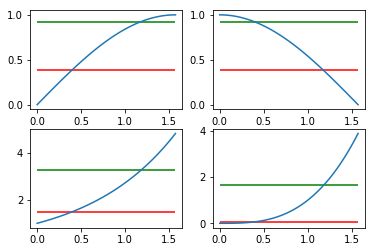

In [33]:
# YOU DO: Make a 2-by-2 grid of plots using the iqr_plot() function using sin, cos, exp, and x ** 3

_, ax_list = plt.subplots(2, 2)

y_funcs = [np.sin, np.cos, np.exp, lambda x: x ** 3]
for ax, y_func in zip(ax_list.flatten(), y_funcs):
    y_data = y_func(x_data)
    iqr_plot(ax, x_data, y_data)

## Seaborn

A special data visualization library, built on Matplotlib, for drawing statistical graphics.

In [34]:
import seaborn as sns

<class 'seaborn.axisgrid.FacetGrid'>


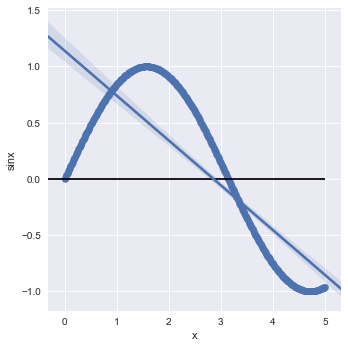

In [35]:
# Seaborn's lmplot method also creates a linear model (pretty fancy for a plotting object?!)
lmplot = sns.lmplot(x='x', y='sinx', data=df.reset_index())

print type(lmplot)

# combine with Matplotlib
lmplot.axes[0,0].hlines(0, -1, 5)

## Compare & Contrast Aesthetics: Seaborn vs. Matplotlib

A traditional matplotlib plot:

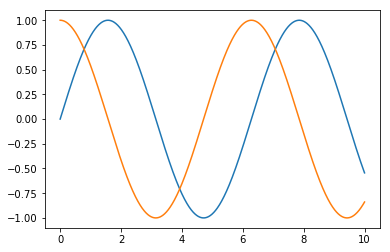

In [36]:
x = np.linspace(0, 10, 1000)

# Seaborn hijacks plt, so as to implement a prettier version of plt's functionality
sns.reset_orig()

plt.plot(x, np.sin(x), x, np.cos(x))

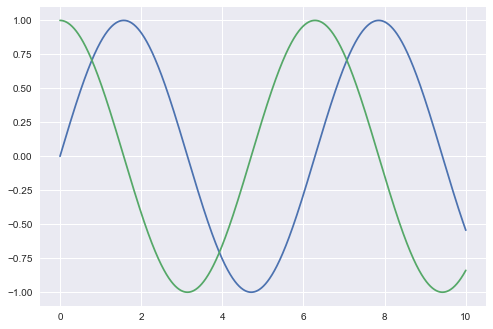

In [37]:
sns.set()

plt.plot(x, np.sin(x), x, np.cos(x))

Oooh, sooo much prettier!

## Important plot types

### Histograms

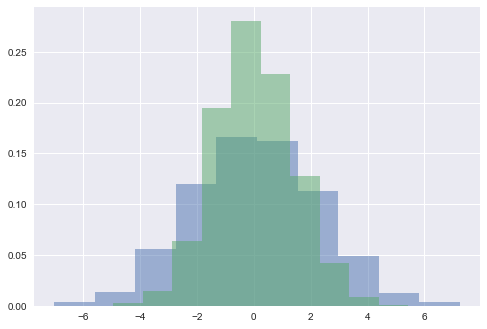

In [38]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

### Kernel density estimate plots (smoothed histograms)

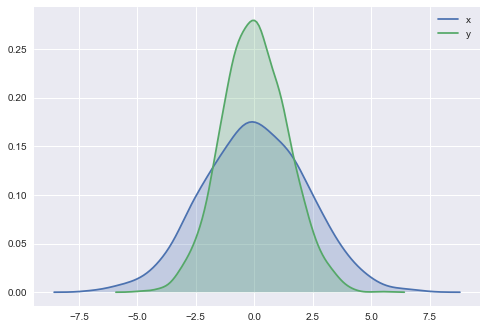

In [39]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

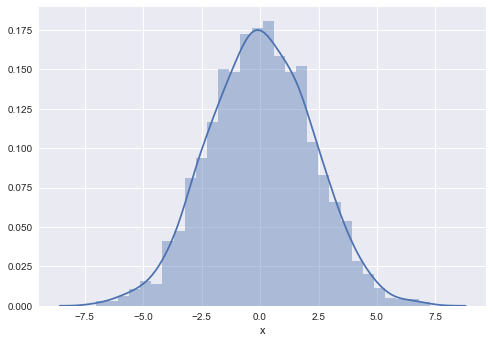

In [40]:
# both histograms and Kernel density plots can be shown together:

sns.distplot(data['x'])

With histograms, few bins can hide details. With many, each point just becomes its own 'needle', which obscures density. The width of kernels is a very similar trade-off for kde-plots.

Kde-plots can also be used in two dimensions to give a better feel for the density distribution.

### Pair plots

These offer a great first look at a data set. If there are too many variables, these can be run on targeted subsets of columns.

In [41]:
iris = sns.load_dataset('iris')

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


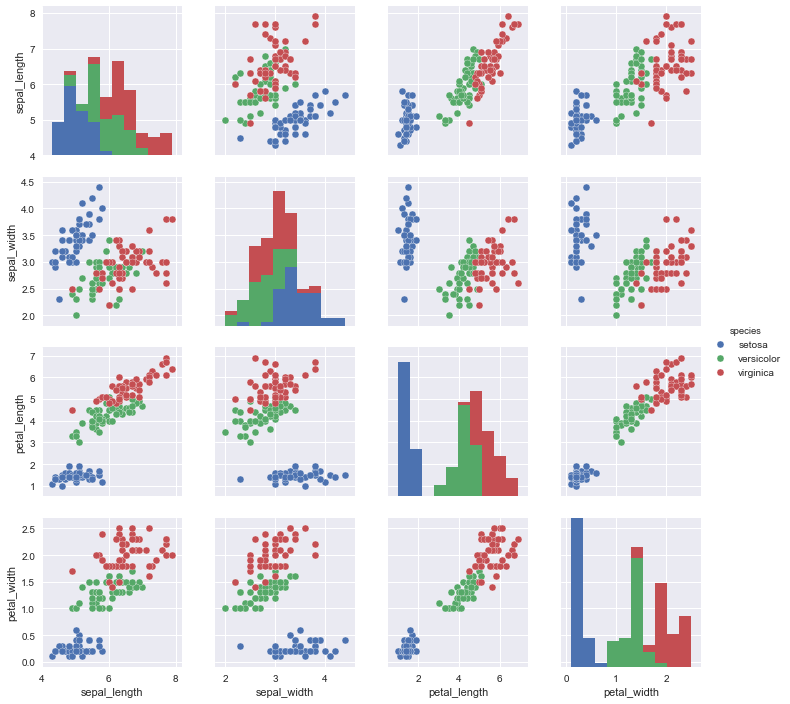

In [42]:
sns.pairplot(iris, hue='species', size=2.5)

### Facetplots

Show subplots by values of given columns. Allows you to see how things are affected by categorical variables (or dividing lines within continuous variables).

In [43]:
tips = sns.load_dataset('tips')

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


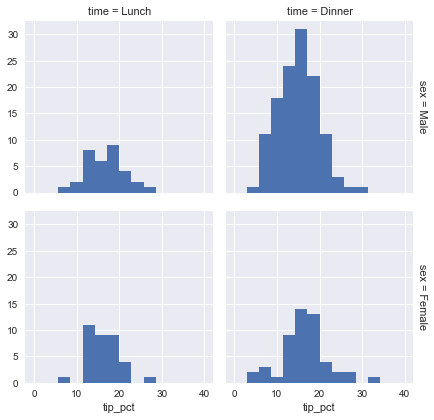

In [44]:
tips['tip_pct'] = 100. * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, 'tip_pct', bins=np.linspace(0, 40, 15))

### Challenge: How many dimensions can you visualize at once?

2 + 'several'

### How many would you want to?

Not so many that your audience gets lost

### Joint distributions

`kind='hex'` shows a density function with two input dimensions.

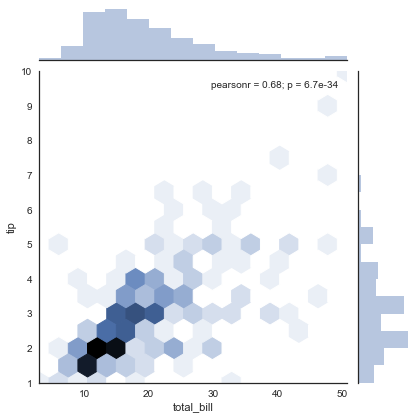

In [45]:
with sns.axes_style('white'):
    sns.jointplot('total_bill', 'tip', data=tips, kind='hex')

By specifying `kind='reg'` instead, we get a more informative linear regression.  Benefit: understanding model behavior in addition to data!

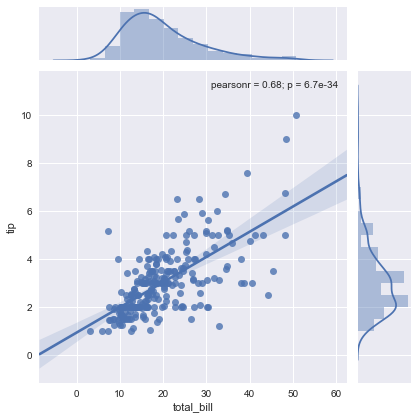

In [46]:
sns.jointplot('total_bill', 'tip', data=tips, kind='reg')

### Violin plots

A pretty way to show densities as they depend on another variable (or even paired densities on a third variable).

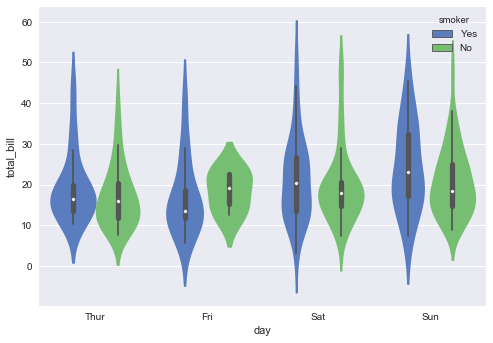

In [47]:
sns.violinplot(x='day', y='total_bill', hue='smoker', data=tips, palette='muted')

Now, here's the same information except scrunched together in a way that highlights the contrast by smoker. (Note the `split` argument)

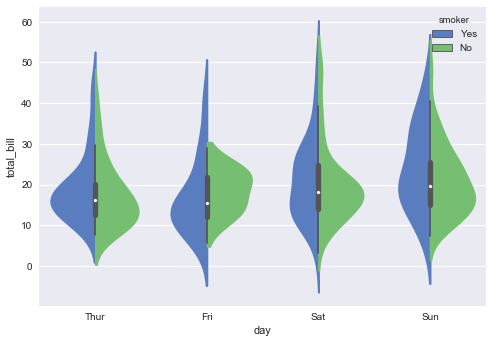

In [48]:
sns.violinplot(x='day', y='total_bill', hue='smoker', data=tips, palette='muted', split=True)

# Plotting Takeways

- Being good at **one** plotting tool is a vital Data Science skill:
  - For learning from your data
  - For telling persuasive stories to others
- pandas and Seaborn are modern and relatively seamless plugins to Matplotlib. Why don't you standardize on one of them (at least for now)?
- Plots are mostly 2D, with some 3D. But you can cram in up to several additional dimensions if you really need to
- **In order to get fluent with this, you really do need to experiment with the different plot types and their objects and methods!**